In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.metrics import precision_recall_fscore_support, recall_score, precision_score

In [15]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import shap

In [10]:
df = pd.read_csv('../data/training_with_macro.csv')

In [29]:
data = df[['charge_off', 'month_diff', 'account_status_code', 'bank_fico_buckets_20', 'ever_delinquent_flg', 'mob', 'balance_decrease','industry_A', 'industry_B', 'industry_C', 'unemployment_rate', 'debt_service_burden', 'consumer_credit', 'interest_rates', 'charge_off_rates']]
X1 = df[['month_diff', 'account_status_code', 'bank_fico_buckets_20', 'ever_delinquent_flg', 'mob', 'balance_decrease','industry_A', 'industry_B', 'industry_C', 'unemployment_rate', 'debt_service_burden', 'consumer_credit', 'interest_rates', 'charge_off_rates']]
y1 = df['charge_off']

In [16]:
####### split the train and validation dataset #######
df_train, df_test = train_test_split(data, train_size=0.7, stratify=y, random_state=0)

In [17]:
X_train = X = df_train[['month_diff', 'account_status_code', 'bank_fico_buckets_20', 'ever_delinquent_flg', 'mob', 'balance_decrease','industry_A', 'industry_B', 'industry_C', 'unemployment_rate', 'debt_service_burden', 'consumer_credit', 'interest_rates', 'charge_off_rates']].values
y_train = df_train['charge_off'].values

X_test = X = df_test[['month_diff', 'account_status_code', 'bank_fico_buckets_20', 'ever_delinquent_flg', 'mob', 'balance_decrease','industry_A', 'industry_B', 'industry_C', 'unemployment_rate', 'debt_service_burden', 'consumer_credit', 'interest_rates', 'charge_off_rates']].values
y_test = df_test['charge_off'].values

In [18]:
####### resampling #######
smote_enn = SMOTEENN(random_state=0, sampling_strategy=0.6)

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_resampled).items()))
print(sorted(Counter(y_test).items()))

[(0, 3874632), (1, 2400864)]
[(0, 1722758), (1, 4709)]


In [19]:
####### CatBoostClassifier #######
cbc = CatBoostClassifier()
cbc.fit(X_train_resampled, y_train_resampled)
y_pred = cbc.predict(X_test)

Learning rate set to 0.431052
0:	learn: 0.1978811	total: 807ms	remaining: 13m 25s
1:	learn: 0.1454878	total: 1.3s	remaining: 10m 47s
2:	learn: 0.1192352	total: 1.8s	remaining: 9m 57s
3:	learn: 0.0966220	total: 2.28s	remaining: 9m 28s
4:	learn: 0.0807204	total: 2.73s	remaining: 9m 4s
5:	learn: 0.0611113	total: 3.15s	remaining: 8m 42s
6:	learn: 0.0495094	total: 3.6s	remaining: 8m 31s
7:	learn: 0.0421807	total: 4.07s	remaining: 8m 24s
8:	learn: 0.0367724	total: 4.54s	remaining: 8m 19s
9:	learn: 0.0312327	total: 4.97s	remaining: 8m 11s
10:	learn: 0.0298476	total: 5.39s	remaining: 8m 4s
11:	learn: 0.0283025	total: 5.93s	remaining: 8m 8s
12:	learn: 0.0268611	total: 6.39s	remaining: 8m 5s
13:	learn: 0.0253178	total: 6.93s	remaining: 8m 8s
14:	learn: 0.0241848	total: 7.4s	remaining: 8m 6s
15:	learn: 0.0220174	total: 7.87s	remaining: 8m 3s
16:	learn: 0.0201235	total: 8.3s	remaining: 7m 59s
17:	learn: 0.0197881	total: 8.71s	remaining: 7m 55s
18:	learn: 0.0187455	total: 9.13s	remaining: 7m 51s
19

158:	learn: 0.0071000	total: 1m 5s	remaining: 5m 47s
159:	learn: 0.0071000	total: 1m 6s	remaining: 5m 46s
160:	learn: 0.0071000	total: 1m 6s	remaining: 5m 45s
161:	learn: 0.0071000	total: 1m 6s	remaining: 5m 45s
162:	learn: 0.0070999	total: 1m 7s	remaining: 5m 44s
163:	learn: 0.0070830	total: 1m 7s	remaining: 5m 44s
164:	learn: 0.0070829	total: 1m 7s	remaining: 5m 43s
165:	learn: 0.0070829	total: 1m 8s	remaining: 5m 42s
166:	learn: 0.0070819	total: 1m 8s	remaining: 5m 41s
167:	learn: 0.0070817	total: 1m 8s	remaining: 5m 40s
168:	learn: 0.0070734	total: 1m 9s	remaining: 5m 40s
169:	learn: 0.0070733	total: 1m 9s	remaining: 5m 39s
170:	learn: 0.0070609	total: 1m 9s	remaining: 5m 38s
171:	learn: 0.0070608	total: 1m 10s	remaining: 5m 38s
172:	learn: 0.0070606	total: 1m 10s	remaining: 5m 37s
173:	learn: 0.0070605	total: 1m 10s	remaining: 5m 36s
174:	learn: 0.0070604	total: 1m 11s	remaining: 5m 36s
175:	learn: 0.0070603	total: 1m 11s	remaining: 5m 35s
176:	learn: 0.0070601	total: 1m 12s	remai

311:	learn: 0.0069040	total: 2m 1s	remaining: 4m 28s
312:	learn: 0.0069040	total: 2m 2s	remaining: 4m 27s
313:	learn: 0.0069040	total: 2m 2s	remaining: 4m 27s
314:	learn: 0.0069039	total: 2m 2s	remaining: 4m 27s
315:	learn: 0.0069039	total: 2m 3s	remaining: 4m 26s
316:	learn: 0.0069038	total: 2m 3s	remaining: 4m 26s
317:	learn: 0.0069037	total: 2m 3s	remaining: 4m 25s
318:	learn: 0.0069037	total: 2m 4s	remaining: 4m 25s
319:	learn: 0.0069037	total: 2m 4s	remaining: 4m 24s
320:	learn: 0.0069036	total: 2m 4s	remaining: 4m 24s
321:	learn: 0.0069035	total: 2m 5s	remaining: 4m 23s
322:	learn: 0.0069035	total: 2m 5s	remaining: 4m 23s
323:	learn: 0.0069035	total: 2m 6s	remaining: 4m 23s
324:	learn: 0.0069034	total: 2m 6s	remaining: 4m 22s
325:	learn: 0.0069034	total: 2m 6s	remaining: 4m 22s
326:	learn: 0.0069034	total: 2m 7s	remaining: 4m 21s
327:	learn: 0.0069033	total: 2m 7s	remaining: 4m 21s
328:	learn: 0.0069033	total: 2m 7s	remaining: 4m 20s
329:	learn: 0.0069032	total: 2m 8s	remaining: 

464:	learn: 0.0068674	total: 2m 59s	remaining: 3m 26s
465:	learn: 0.0068674	total: 2m 59s	remaining: 3m 26s
466:	learn: 0.0068673	total: 3m	remaining: 3m 25s
467:	learn: 0.0068673	total: 3m	remaining: 3m 25s
468:	learn: 0.0068673	total: 3m	remaining: 3m 24s
469:	learn: 0.0068673	total: 3m 1s	remaining: 3m 24s
470:	learn: 0.0068672	total: 3m 1s	remaining: 3m 24s
471:	learn: 0.0068672	total: 3m 2s	remaining: 3m 23s
472:	learn: 0.0068672	total: 3m 2s	remaining: 3m 23s
473:	learn: 0.0068672	total: 3m 2s	remaining: 3m 22s
474:	learn: 0.0068671	total: 3m 3s	remaining: 3m 22s
475:	learn: 0.0068671	total: 3m 3s	remaining: 3m 21s
476:	learn: 0.0068671	total: 3m 3s	remaining: 3m 21s
477:	learn: 0.0068671	total: 3m 4s	remaining: 3m 21s
478:	learn: 0.0068670	total: 3m 4s	remaining: 3m 20s
479:	learn: 0.0068670	total: 3m 4s	remaining: 3m 20s
480:	learn: 0.0068670	total: 3m 5s	remaining: 3m 20s
481:	learn: 0.0068670	total: 3m 5s	remaining: 3m 19s
482:	learn: 0.0068670	total: 3m 6s	remaining: 3m 19s


617:	learn: 0.0068587	total: 3m 56s	remaining: 2m 26s
618:	learn: 0.0068586	total: 3m 57s	remaining: 2m 25s
619:	learn: 0.0068585	total: 3m 57s	remaining: 2m 25s
620:	learn: 0.0068585	total: 3m 57s	remaining: 2m 25s
621:	learn: 0.0068583	total: 3m 58s	remaining: 2m 24s
622:	learn: 0.0068583	total: 3m 58s	remaining: 2m 24s
623:	learn: 0.0068582	total: 3m 59s	remaining: 2m 24s
624:	learn: 0.0068582	total: 3m 59s	remaining: 2m 23s
625:	learn: 0.0068581	total: 3m 59s	remaining: 2m 23s
626:	learn: 0.0068580	total: 4m	remaining: 2m 22s
627:	learn: 0.0068580	total: 4m	remaining: 2m 22s
628:	learn: 0.0068574	total: 4m	remaining: 2m 22s
629:	learn: 0.0068574	total: 4m 1s	remaining: 2m 21s
630:	learn: 0.0068574	total: 4m 1s	remaining: 2m 21s
631:	learn: 0.0068574	total: 4m 2s	remaining: 2m 20s
632:	learn: 0.0068573	total: 4m 2s	remaining: 2m 20s
633:	learn: 0.0068573	total: 4m 2s	remaining: 2m 20s
634:	learn: 0.0068572	total: 4m 3s	remaining: 2m 19s
635:	learn: 0.0068572	total: 4m 3s	remaining: 

770:	learn: 0.0068010	total: 4m 53s	remaining: 1m 27s
771:	learn: 0.0068009	total: 4m 53s	remaining: 1m 26s
772:	learn: 0.0068009	total: 4m 53s	remaining: 1m 26s
773:	learn: 0.0068008	total: 4m 54s	remaining: 1m 25s
774:	learn: 0.0068008	total: 4m 54s	remaining: 1m 25s
775:	learn: 0.0068007	total: 4m 54s	remaining: 1m 25s
776:	learn: 0.0068007	total: 4m 55s	remaining: 1m 24s
777:	learn: 0.0068006	total: 4m 55s	remaining: 1m 24s
778:	learn: 0.0068005	total: 4m 55s	remaining: 1m 23s
779:	learn: 0.0068005	total: 4m 56s	remaining: 1m 23s
780:	learn: 0.0068005	total: 4m 56s	remaining: 1m 23s
781:	learn: 0.0068005	total: 4m 56s	remaining: 1m 22s
782:	learn: 0.0068004	total: 4m 57s	remaining: 1m 22s
783:	learn: 0.0068004	total: 4m 57s	remaining: 1m 21s
784:	learn: 0.0068004	total: 4m 57s	remaining: 1m 21s
785:	learn: 0.0068004	total: 4m 58s	remaining: 1m 21s
786:	learn: 0.0068004	total: 4m 58s	remaining: 1m 20s
787:	learn: 0.0068004	total: 4m 58s	remaining: 1m 20s
788:	learn: 0.0068003	total:

925:	learn: 0.0067863	total: 5m 47s	remaining: 27.8s
926:	learn: 0.0067862	total: 5m 48s	remaining: 27.4s
927:	learn: 0.0067862	total: 5m 48s	remaining: 27s
928:	learn: 0.0067862	total: 5m 48s	remaining: 26.7s
929:	learn: 0.0067861	total: 5m 49s	remaining: 26.3s
930:	learn: 0.0067860	total: 5m 49s	remaining: 25.9s
931:	learn: 0.0067860	total: 5m 49s	remaining: 25.5s
932:	learn: 0.0067858	total: 5m 50s	remaining: 25.1s
933:	learn: 0.0067857	total: 5m 50s	remaining: 24.8s
934:	learn: 0.0067722	total: 5m 50s	remaining: 24.4s
935:	learn: 0.0067721	total: 5m 51s	remaining: 24s
936:	learn: 0.0067721	total: 5m 51s	remaining: 23.6s
937:	learn: 0.0067721	total: 5m 51s	remaining: 23.3s
938:	learn: 0.0067721	total: 5m 52s	remaining: 22.9s
939:	learn: 0.0067720	total: 5m 52s	remaining: 22.5s
940:	learn: 0.0067720	total: 5m 52s	remaining: 22.1s
941:	learn: 0.0067719	total: 5m 53s	remaining: 21.8s
942:	learn: 0.0067719	total: 5m 53s	remaining: 21.4s
943:	learn: 0.0067719	total: 5m 54s	remaining: 21s

In [20]:
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

0.1573582501592695 0.34854186265286924


Text(0.5, 1.0, 'SHAP Importance')

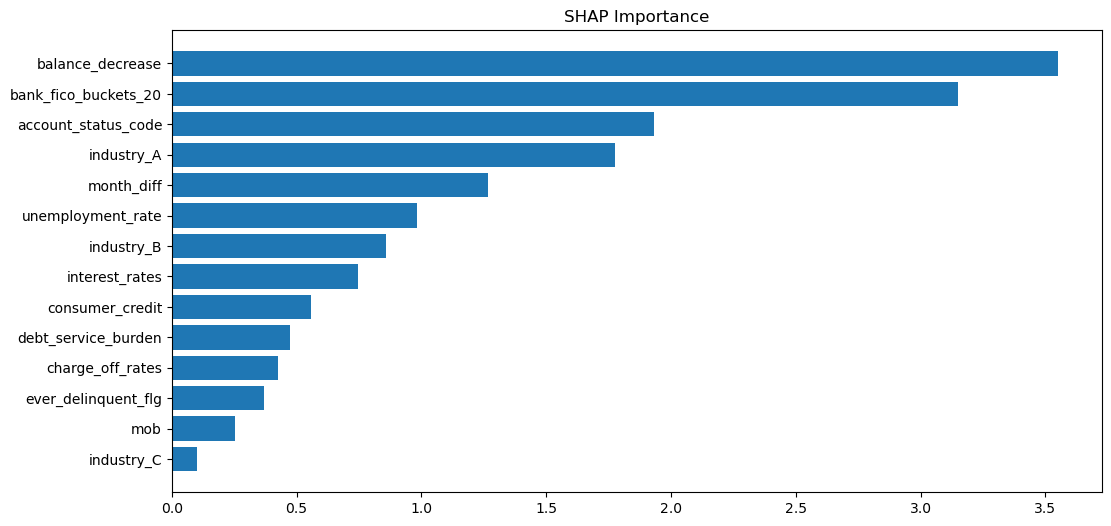

In [30]:
####### Feature Importance #######
explainer = shap.Explainer(cbc)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X1.columns)[sorted_idx])
plt.title('SHAP Importance')

In [ ]:
####### Logistic Regression #######
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=2000)
LR.fit(X_train_resampled, y_train_resampled)
y_pred = LR.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### Random Forest Classifier #######
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)
y_pred = rfc.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### Extra Trees Classifier #######
etc = ExtraTreesClassifier()
etc.fit(X_train_resampled, y_train_resampled)
y_pred = etc.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### Support Vector Classifier #######
svc = SVC(C=1.0, kernel='linear', class_weight='balanced')
svc.fit(X_train_resampled, y_train_resampled)
y_pred = svc.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### XGBClassifier #######
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### Decision Tree Classifier #######
dtc = DecisionTreeClassifier()
dtc.fit(X_train_resampled, y_train_resampled)
y_pred = dtc.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))

In [ ]:
####### K Neighbors Classifier #######
knc = KNeighborsClassifier()
knc.fit(X_train_resampled, y_train_resampled)
y_pred = knc.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))